## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
print('Number of rows = ', df.shape[0])

Number of rows =  294478


c. The number of unique users in the dataset.

In [5]:
print('Number of unique users = ', df.nunique()['user_id'])

Number of unique users =  290584


d. The proportion of users converted.

In [6]:
print('Proportion of users converted = ', (df['converted'] == 1).mean())

Proportion of users converted =  0.119659193556


e. The number of times the `new_page` and `treatment` don't match.

In [7]:
print('The number of times new_page and treatment don\'t match = ', ((df['landing_page'] == 'new_page') == (df['group'] == 'treatment')).value_counts()[False])

The number of times new_page and treatment don't match =  3893


f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


The above cell shows that there are 294478 non-null values for all columns, which is also the number of rows in this dataset. So none of the rows have missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Find the indices of rows where treatment does not match with new_page or control does not match with old_page
indexNames = df[((df['landing_page'] == 'new_page') != (df['group'] == 'treatment')) | ((df['landing_page'] == 'old_page') != (df['group'] == 'control'))].index
# Drop the above rows
df2 = df.drop(indexNames)
# Verify that the number of rows is less in the new dataframe
df2.shape

(290585, 5)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
print('Number of unique user ids in df2 = ', df2.nunique()['user_id'])

Number of unique user ids in df2 =  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
print('The duplicate user_id in df2 = ', df2[df2.duplicated('user_id')]['user_id'].iloc[0])

The duplicate user_id in df2 =  773192


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
duplicate_user_id_index = df2[df2.duplicated('user_id')].index
df2.drop(duplicate_user_id_index, inplace=True)
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
print('The probability of an individual converting regardless of the page they receive = ', (df2['converted'] == 1).mean())

The probability of an individual converting regardless of the page they receive =  0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2_control = df2.query("group == 'control'")
print('The probability of an individual converting in the control group = ', (df2_control['converted'] == 1).mean())

The probability of an individual converting in the control group =  0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2_treatment = df2.query("group == 'treatment'")
print('The probability of an individual converting in the treatment group = ', (df2_treatment['converted'] == 1).mean())

The probability of an individual converting in the treatment group =  0.118808065515


d. What is the probability that an individual received the new page?

In [18]:
print('The probability that an individual received the new page = ', (df2['landing_page'] == 'new_page').mean())

The probability that an individual received the new page =  0.500061944223


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**: The probability of an individual being in the *control* or *treatment* group is the same (0.5 as found by the probability of an individual receiving a new page). This is because the *control* group receives the old page and the *treatment* group receives the new page. Now from the above values, the probability of an individual converting in the *control* group is more than the *treatment* group. So the new treatment page does not lead to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**: The null and alternative hypotheses can be stated as follows:

$$H_0: p_{new} <= p_{old}$$
$$H_1: p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new_conversion_rate = (df2['converted'] == 1).mean()
print('p_new conversion rate = ', p_new_conversion_rate)

p_new conversion rate =  0.119597087245


The **conversion rate** for $p_{new}$ under the null is given by the value above.

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old_conversion_rate = p_new_conversion_rate
print('p_old conversion rate = ', p_old_conversion_rate)

p_old conversion rate =  0.119597087245


The **conversion rate** for $p_{old}$ under the null is given by the value above.

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = (df2['group'] == 'treatment').sum()
print('n_new = ', n_new)

n_new =  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = (df2['group'] == 'control').sum()
print('n_old = ', n_old)

n_old =  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new_conversion_rate, p_new_conversion_rate])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old_conversion_rate, p_old_conversion_rate])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_new_old_diff = (new_page_converted == 1).mean() - (old_page_converted == 1).mean()
p_new_old_diff

-0.0012409930700062188

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = np.zeros(10000)
for i in range(10000):
    new_page_converted1 = np.random.choice([0, 1], size=n_new, p=[1-p_new_conversion_rate, p_new_conversion_rate])
    old_page_converted1 = np.random.choice([0, 1], size=n_old, p=[1-p_old_conversion_rate, p_old_conversion_rate])
    p_diffs[i] = (new_page_converted1 == 1).mean() - (old_page_converted1 == 1).mean()

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   11.,    96.,   588.,  1789.,  3031.,  2687.,  1362.,   371.,
           59.,     6.]),
 array([-0.00462713, -0.00367526, -0.0027234 , -0.00177153, -0.00081966,
         0.00013221,  0.00108407,  0.00203594,  0.00298781,  0.00393968,
         0.00489155]),
 <a list of 10 Patch objects>)

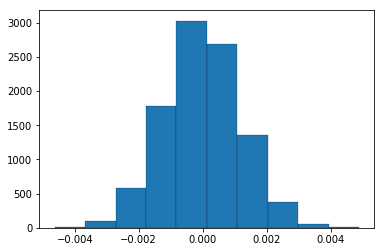

In [27]:
plt.hist(p_diffs, edgecolor='black', linewidth=0.2)

The above histogram looks as expected with the distribution centered around a mean of 0, which is the assumption of our null hypothesis.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
p_new_old_diff_actual = (df2_treatment['converted'] == 1).mean() - (df2_control['converted'] == 1).mean()
p_new_old_diff_actual

-0.0015782389853555567

The actual difference ($p_{new}-p_{old}$) observed in our data set is given by the value above.

In [29]:
(p_diffs > p_new_old_diff_actual).mean()

0.90739999999999998

The proportion of **p_diffs** greater than the actual difference is given by the value above.

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**: The value computed above is the probability of obtaining our observed statistic or one more extreme in favor of the alternative hypothesis, given that our null hypothesis is true. This is called the **p-value** in scientific studies. Since our type 1 error rate $\alpha = 0.05$, we see that the **p-value** is much greater than $\alpha$. So we fail to reject $H_0$. This means that there is not much difference between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = (df2_control['converted'] == 1).sum()
convert_new = (df2_treatment['converted'] == 1).sum()
n_old = df2_control.shape[0]
n_new = df2_treatment.shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_val = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], 0)
z_score, p_val

(-1.3109241984234394, 0.18988337448195103)

The z-score and p-value computed using the built-in are shown above.

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**: The p-value computed above is still greater than $\alpha = 0.05$. So we fail to reject the null. This implies that there is not much difference in the conversion rates of old and new pages. This agrees with what we concluded in parts **j.** and **k.** above.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**: We would be performing logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df3 = pd.get_dummies(df2, columns=['group'], drop_first=True)
df3['intercept'] = 1
df3.head()

,user_id,timestamp,landing_page,converted,group_treatment,intercept
0,851104,2017-01-21 22:11:48.556739,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,0,1


The above code is used to create a categorical variable for the **group** column and add an **intercept** column. We rename the dummy variable column to **ab_page** using the code below.

In [33]:
df3.rename(columns={'group_treatment':'ab_page'}, inplace=True)
df3.head()

,user_id,timestamp,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-03-20 04:01 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [52]:
np.exp(-0.015)

0.98511193960306265

The above value means that conversion is 0.99 (or approximately 1) times more likely if the page is from the treatment group. This means that the page doesn't have a significant effect on conversion.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**: The p-value associated with **ab_page** is 0.1899. This is different from the value found in **Part II** (0.905) because of the difference in null and alternative hypotheses used. The null and alternative hypotheses for our regression model are as follows:

$$H_0: p_{new} = p_{old}$$
$$H_1: p_{new} \neq p_{old}$$

This is different from the hypotheses used in **Part II**, which is as follows:

$$H_0: p_{new} <= p_{old}$$
$$H_1: p_{new} > p_{old}$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**: We should consider other factors because our model might be underfitting (high bias), i.e., it might not generalize well to new data. The disadvantage of adding additional terms is possible increase in fitting time and possibility of overfitting if too many terms are added. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


The above cell was used to to read **countries.csv** and see how it looks like.

In [44]:
df4 = df3.merge(df_countries, left_on='user_id', right_on='user_id')
df5 = pd.get_dummies(df4, columns=['country'], drop_first=True)
df5.tail()

,user_id,timestamp,landing_page,converted,ab_page,intercept,country_UK,country_US
290579,751197,2017-01-03 22:28:38.630509,old_page,0,0,1,0,1
290580,945152,2017-01-12 00:51:57.078372,old_page,0,0,1,0,1
290581,734608,2017-01-22 11:45:03.439544,old_page,0,0,1,0,1
290582,697314,2017-01-15 01:20:28.957438,old_page,0,0,1,0,1
290583,715931,2017-01-16 12:40:24.467417,new_page,0,1,1,1,0


We merge the two data frames based on **user_id** columns as above and create two dummy variables to represent the country.

In [46]:
logit_mod2 = sm.Logit(df5['converted'], df5[['intercept', 'country_UK', 'country_US']])
results2 = logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-03-20 04:38 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
country_UK     0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
country_US     0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

The above cell instantiates the logistic regression model and fits it using the intercept and country categorical variables. We see that we have non-zero p-values for both **country_UK** and **country_US**. We can assess the impact of country by calculating the values below.

In [48]:
np.exp(0.0507), np.exp(0.0408)

(1.0520072437650141, 1.0416437559600236)

The above values mean that conversions are 1.05 times more likely when individuals are from UK and 1.04 times more likely when individuals are from US. We see that both values are almost 1. This shows that country doesn't impact the conversion much.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

We fit the new model by adding the **ab_page** column into our list of independent variables as follows.

In [49]:
logit_mod3 = sm.Logit(df5['converted'], df5[['intercept', 'ab_page', 'country_UK', 'country_US']])
results3 = logit_mod3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-03-20 04:52 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
country_UK     0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
country_US     0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

The above cell instantiates the new model, fits it and provides the summary results. We notice that the coefficients for **ab_page**, **country_UK** and **country_US** are almost same compared to the cases when we analyzed their effects individually. The p-values are also not radically different. So we conclude that the interaction between page and country does not have significant effects on conversion.

<a id='conclusions'></a>
## Conclusions

We conducted a series of analyses to find out if the company should implement the new page or not. Our statistical results based on A/B testing and logistic regression indicate that there is not much difference in conversion rate between the old and new pages. We also analyzed the effect of the country a user belongs to. The statistical result here also shows that the conversions are independent of the country. However, practically we expect some difference in conversion rate based on the country since users from different countries might have different tastes. It is also possible that the experiment needs to be run longer to get a clearer picture of conversion rate between old and new pages. We might come across an unbiased set of users who are not affected by change aversion or novelty effect.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])